In [51]:
from __future__ import print_function

import os
import sys
sys.path.append('/home/jogi/git/repository/smart_play_set')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

from utils.smart_utils import get_dir_path, tensor_to_pandas, load_hdf5_file
from utils.smart_utils import get_array_filenames, split_on_classes
from utils.smart_utils import FuturoCube, calc_cos_sim, get_other_label
from preprocessing.process_data import get_data

from utils.plot_utils import plot_cos_sim
from utils.plot_utils import single_file_plots, load_file_to_pandas


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Number of files loaded 55
('data.shape ', (3748, 4))
('cos_sims.shape ', (3748, 1))


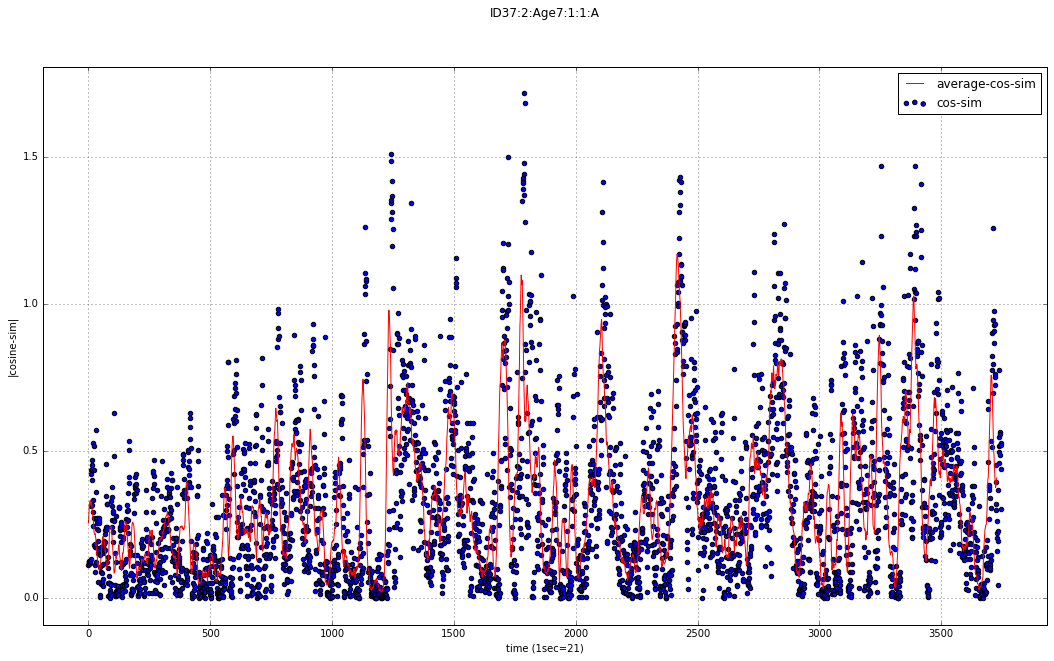

('data.shape ', (3744, 4))
('cos_sims.shape ', (3744, 1))


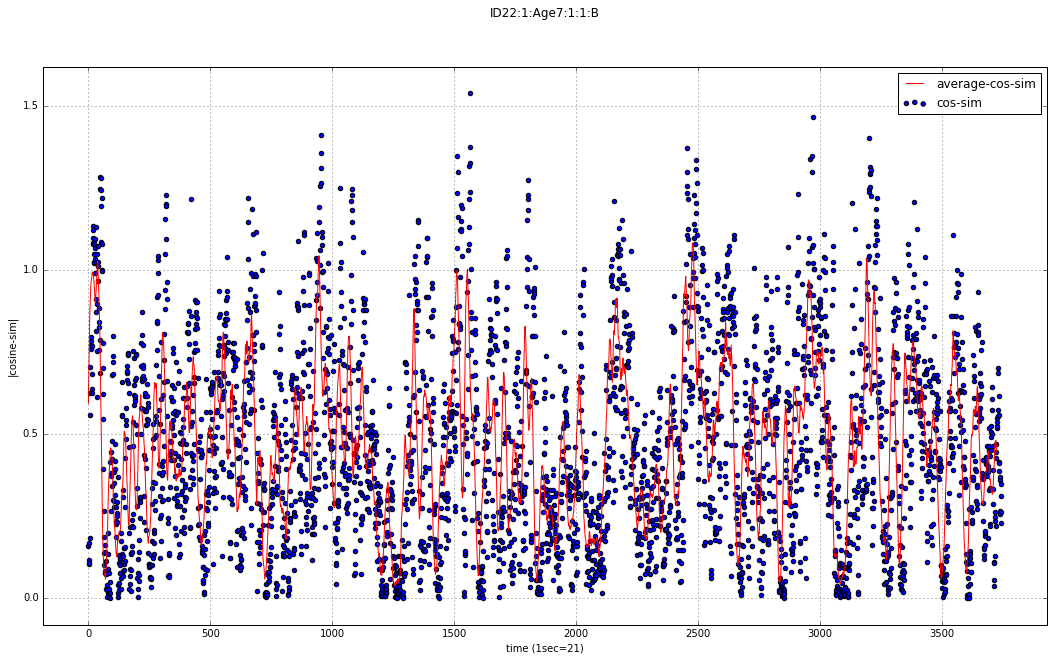

('data.shape ', (3748, 4))
('cos_sims.shape ', (3748, 1))


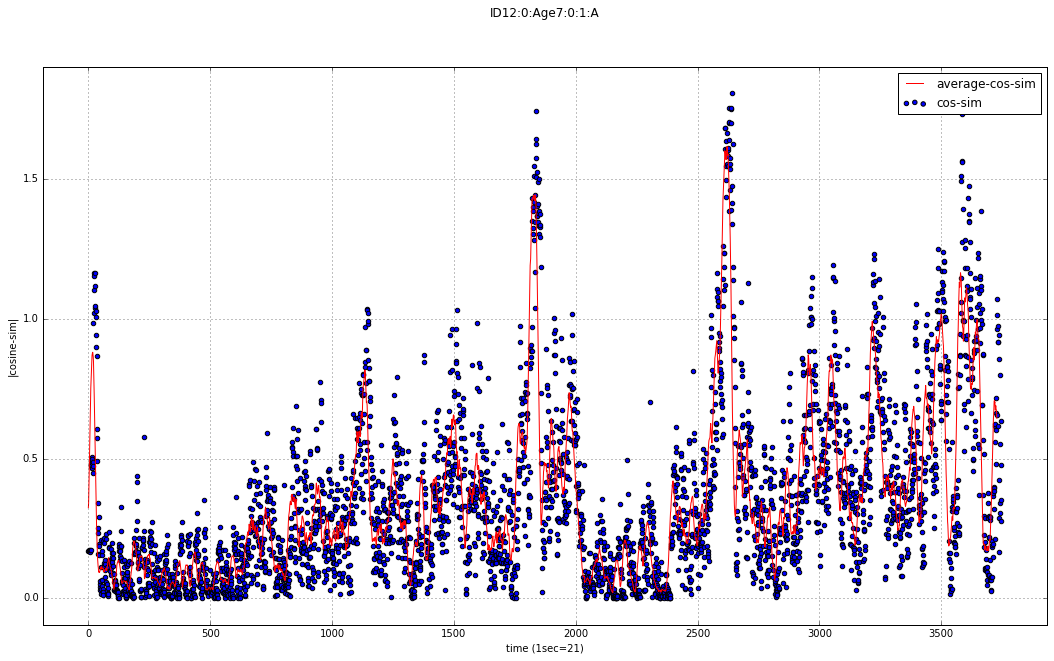

In [11]:
files = get_array_filenames('20161206', device='futurocube', game='roadrunner', sequence=1, file_ext='csv')
print("Number of files loaded %d" % len(files))

# limit plots to one child
files = [files[0], files[24], files[43]]

for filename in files:
    labels = filename[filename.index('[') + 1:filename.index(']')]
    r_signal = (load_file_to_pandas("futurocube", "roadrunner", filename, dims=4)).as_matrix()
    plot_cos_sim(r_signal, width=18, height=10, p_title=labels)

In [180]:
def prepare_data(option=330, two_class_opt='2_and_1'):
    
    if option == 330:
        x_train_all, y_labels_all, other_labels, dta_dict_f = get_data('20161206', force=False, 
                                                               apply_window_func=True, calc_mag=True,
                                                               extra_label="20hz_1axis_low8hz_330_12_True", 
                                                               optimal_w_size=False,
                                                               f_type='low', lowcut=8, b_order=5)

    elif option == 990:
        x_train_all, y_labels_all, other_labels, dta_dict_f = get_data('20161206', force=False, 
                                                               apply_window_func=True, calc_mag=True,
                                                               extra_label="20hz_1axis_low8hz_990_12_True", 
                                                               optimal_w_size=False,
                                                               f_type='low', lowcut=8, b_order=5)
    else:
        raise NotImplementedError("Error, %s as option is not implemented" % str(option))

    print(x_train_all.shape)
    print(y_labels_all.shape)
    features = dta_dict_f['features']

    y_labels_all = np.squeeze(y_labels_all)
    y_labels_2c = np.zeros(y_labels_all.shape[0])
    y_labels_2c[:] = y_labels_all[:]
    if two_class_opt == '2_and_1':
        # merge group 1 and 2
        y_labels_2c[y_labels_2c==2] = 1
        print(np.where(y_labels_2c==0)[0].shape)
        print(np.where(y_labels_2c==1)[0].shape)
    else:
        # merge 1 with 0 group
        y_labels_2c[y_labels_2c==1] = 0
        y_labels_2c[y_labels_2c==2] = 1
        print(np.where(y_labels_2c==0)[0].shape)
        print(np.where(y_labels_2c==1)[0].shape)
        
    print("Unique labels y_labels_all ", np.unique(y_labels_all))
    print("Unique labels y_labels_2c ", np.unique(y_labels_2c))
    
    
    return x_train_all, y_labels_all, y_labels_2c, features, other_labels

x_train_all, y_labels_all, y_labels_2c, features, other_labels = prepare_data(330, two_class_opt='2_and_1')
print(features)

INFO - Used data label 20161206_futurocube_roadrunner_20hz_1axis_low8hz_330_12_True
INFO Loading matrices from h5 file /mnt/disk2/git/repository/smart_play_set/data/futurocube/roadrunner/20161206_futurocube_roadrunner_20hz_1axis_low8hz_330_12_True.h5
('INFO - List of arrays in this file: \n', [u'feature_data', u'label_data', u'label_game_level'])
INFO - Loading data description from json.
(330, 12)
(330, 1)
(210,)
(120,)
Unique labels y_labels_all  [0 1 2]
Unique labels y_labels_2c  [ 0.  1.]
[u'minf', u'maxf', u'mean', u'std', u'median', u'range', u'rms', u'mean_squared_jerk', u'dc', u'energy', u'power_spec_entropy', u'cos_sim']


In [181]:
# ID12:0:Age7:0:1:A,  ID22:1:Age7:1:1:A,  ID19:2:Age7:1:1:A

y_label_id = get_other_label(other_labels, "ID")
y_label_perm = get_other_label(other_labels, "perm")
y_label_level = get_other_label(other_labels, "level")
print(y_label_level.shape)

(330,)


In [115]:
g1 = x_train_all[(y_labels_2c=0) & (y_label_level==1)]

In [117]:
g2 = x_train_all[(y_label_id==12) & (y_label_perm=='A') & (y_label_level==3), 11]

print(g1) 
print(g2)

[ 0.66868112  1.24276845]
[-0.04078979  1.94045609]


In [182]:
import scipy.stats as stats

print(np.unique(y_labels_all))

# g1 = x_train_all[(y_labels_all==0) & (y_label_level==3)]
# g2 = x_train_all[(y_labels_all==2) & (y_label_level==3)]
g1 = x_train_all[(y_labels_all==0) ]
g2 = x_train_all[(y_labels_all==1) ]
t_values, p_values = stats.stats.ttest_ind(a = g1, b = g2)
for i, f in enumerate(features):
    print("feature %s: p_value %.4f" % (features[i], p_values[i]))

[0 1 2]
feature minf: p_value 0.1555
feature maxf: p_value 0.0000
feature mean: p_value 0.3595
feature std: p_value 0.0048
feature median: p_value 0.4438
feature range: p_value 0.0000
feature rms: p_value 0.1387
feature mean_squared_jerk: p_value 0.0000
feature dc: p_value 0.4921
feature energy: p_value 0.0981
feature power_spec_entropy: p_value 0.0024
feature cos_sim: p_value 0.0614


In [143]:
g1 = x_train_all[(y_labels_2c==1) & (y_label_level==1)]
g2 = x_train_all[(y_labels_2c==1) & (y_label_level==3)]
t_values, p_values = stats.ttest_rel(a = g1, b = g2)
for i, f in enumerate(features):
    print("feature %s: p_value %.4f" % (features[i], p_values[i]))

feature minf: p_value 0.6456
feature maxf: p_value 0.1718
feature mean: p_value 0.9478
feature std: p_value 0.0588
feature median: p_value 0.5205
feature range: p_value 0.1785
feature rms: p_value 0.7125
feature mean_squared_jerk: p_value 0.0000
feature dc: p_value 0.9025
feature energy: p_value 0.3053
feature power_spec_entropy: p_value 0.0007
feature cos_sim: p_value 0.0092
